In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import matplotlib.patches as patches

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Compilation of oceanic crustal thickness from Chen et al. 1992
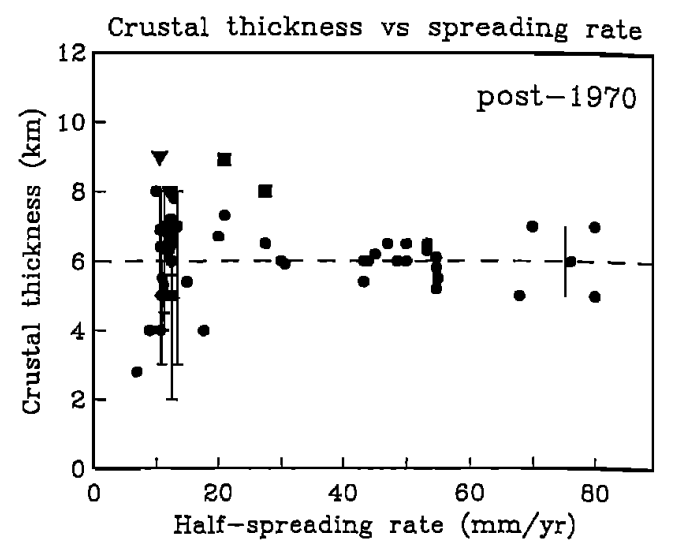

In [3]:
spread_rate_ocean=pd.read_excel('Crustal_Thickness_Compilation.xlsx', sheet_name='Chen_1992')
spread_rate_p40=spread_rate_ocean.loc[spread_rate_ocean['Spreading_rate']>40]
spread_rate_l40=spread_rate_ocean.loc[spread_rate_ocean['Spreading_rate']<40]

Arc_Profeta=pd.read_excel('Crustal_Thickness_Compilation.xlsx', sheet_name='Profeta_2015')
OIB_Comp=pd.read_excel('Crustal_Thickness_Compilation.xlsx', sheet_name='Ocean_Islands')

In [4]:
## Fluid inclusion errors
density_lin=np.array([0.5, 0.9, 1.2])
df=pd.DataFrame(data={'Density': density_lin,
                             'name': 'test'})
Av_df_2step=pf.loop_all_FI_MC(T_K=1150+273.15,
                        CO2_density_gcm3=df['Density'],
                        sample_ID=df['name'],
                        crust_dens_kgm3=2900, 
                        N_dup=1000,
                        error_T_K=50, 
                        error_CO2_dens=0.0114, 
                        error_crust_dens=0,
                    error_type_T_K='Abs', error_dist_T_K='normal',
                    error_type_CO2_dens='Norm', error_dist_CO2_dens='normal',
                    error_type_crust_dens='Abs', 
                    error_dist_crust_dens='uniform',
                    plot_figure=False)
Av_df_2step.head()

working on sample number 0


,Filename,SingleFI_D_km,std_dev_MC_D_km,SingleFI_P_kbar,std_dev_MC_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,error_T_K,error_CO2_dens,error_crust_dens
0,test,7.395065,0.398896,2.101677,0.113366,2.106645,2.104114,7.412545,7.403637,50,0.0114,0
1,test,22.524970,1.027228,6.401596,0.291938,6.399248,6.399451,22.516708,22.517421,50,0.0114,0
2,test,45.389517,1.636998,12.899701,0.465235,12.887724,12.874815,45.347375,45.301954,50,0.0114,0


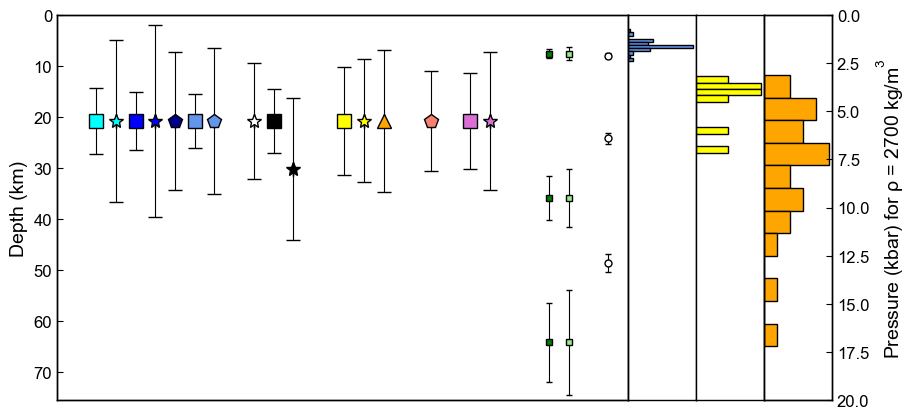

In [5]:
fig, ((ax1),(ax1b), (ax1d), (ax1c)) = plt.subplots(1, 4, figsize=(10,5),gridspec_kw={'width_ratios': [4.2, 0.5, 0.5, 0.5]})
plt.subplots_adjust(wspace=0, hspace=0)

# Compilation of errors. Square is calibration data, 
#-----------------Cpx - Liq -------------------#
ax2=ax1.twinx()
ax2b=ax1c.twinx()
int_mod_s=0.5
bet_mod_s=1

Pressure_set=5.5

# Putirka et al. 2003
ax2.errorbar(0, Pressure_set, 
             xerr=0, yerr=1.7, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='cyan', 
             ms=10, mec='k', 
             label='Putirka et al. 2003')
ax2.errorbar(0+int_mod_s, Pressure_set, 
             xerr=0, yerr=4.2, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='cyan', 
             ms=10, mec='k', 
             label='Putirka et al. 2003')



# Putirka (2008) eq32c
ax2.errorbar(0+bet_mod_s, Pressure_set, 
             xerr=0, yerr=1.5, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='blue', 
             ms=10, mec='k', 
             label='eq32c')
ax2.errorbar(0+bet_mod_s+int_mod_s, Pressure_set, 
             xerr=0, yerr=5, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='blue', 
             ms=10, mec='k', 
             label='eq32c')


# Putirka (2008) eq30

ax2.errorbar(0+2*bet_mod_s, Pressure_set, 
             xerr=0, yerr=3.6, capsize=5,
             fmt='p', ecolor='k', 
             elinewidth=0.8, mfc='darkblue', 
             ms=10, mec='k', 
             label='eq32c')


# Neave and Putirka 2017

ax2.errorbar(0+2.5*bet_mod_s, Pressure_set, 
             xerr=0, yerr=1.4, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='cornflowerblue', 
             ms=10, mec='k', 
             label='NP17')
ax2.errorbar(0+2.5*bet_mod_s+int_mod_s, Pressure_set, 
             xerr=0, yerr=3.8, capsize=5,
             fmt='p', ecolor='k', 
             elinewidth=0.8, mfc='cornflowerblue', 
             ms=10, mec='k', 
             label='NP17')

# Petrelli et al. 2020
ax2.errorbar(0+4*bet_mod_s, Pressure_set, 
             xerr=0, yerr=3, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='white', 
             ms=10, mec='k', 
             label='Pet20')

# Wang et al. (2021)
ax2.errorbar(0+4.5*bet_mod_s, Pressure_set, 
             xerr=0, yerr=1.66, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='black', 
             ms=10, mec='k', 
             label='Wang21')
ax2.errorbar(0+4.5*bet_mod_s+int_mod_s, 8, 
             xerr=0, yerr=3.68, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='black', 
             ms=10, mec='k', 
             label='Wang21')
## Cpx-Opx
cpx_opx_start=6.3
ax2.errorbar(0+cpx_opx_start, Pressure_set, 
             xerr=0, yerr=2.8, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='yellow', 
             ms=10, mec='k', 
             label='eq39')
ax2.errorbar(0+cpx_opx_start+int_mod_s, Pressure_set, 
             xerr=0, yerr=3.2, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='yellow', 
             ms=10, mec='k', 
             label='eq39')

# Eq38 - 3.7

ax2.errorbar(0+cpx_opx_start+1, Pressure_set, 
             xerr=0, yerr=3.7, capsize=5,
             fmt='^', ecolor='k', 
             elinewidth=0.8, mfc='orange', 
             ms=10, mec='k', 
             label='eq38')

## Orthopyroxene - Equation 29a
opx_start=8.5
ax2.errorbar(0+opx_start, Pressure_set, 
             xerr=0, yerr=2.6, capsize=5,
             fmt='p', ecolor='k', 
             elinewidth=0.8, mfc='salmon', 
             ms=10, mec='k', 
             label='eq39')

# Equation 29c - Opx -only
ax2.errorbar(0+opx_start+2*int_mod_s, Pressure_set, 
             xerr=0, yerr=2.5, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='orchid', 
             ms=10, mec='k', 
             label='eq39')
ax2.errorbar(0+opx_start+int_mod_s*3, Pressure_set, 
             xerr=0, yerr=3.6, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='orchid', 
             ms=10, mec='k', 
             label='eq39')


## OPAM


## Amp- only and melt inclusions #################################
Amp_start=11.5
# Ridolfi gives as 12% errors
P_perc=np.linspace(2, 17, 3)
ax2.errorbar(P_perc*0+Amp_start, P_perc, 
             xerr=0, yerr=P_perc*0.12, capsize=2,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='green', 
             ms=5, mec='k', 
             label='Ridolfi21')


ax2.errorbar(P_perc*0+Amp_start+0.5*bet_mod_s, P_perc, 
             xerr=0, yerr=P_perc*0.16, capsize=2,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='lightgreen', 
             ms=5, mec='k', 
             label='Ridolfi21')

# Kyles FIs
ax2.errorbar(0*Av_df_2step['Mean_MC_P_kbar']+Amp_start+1.5, Av_df_2step['Mean_MC_P_kbar'], 
             xerr=0, yerr=Av_df_2step['std_dev_MC_P_kbar'], capsize=2,
             fmt='o', ecolor='k', 
             elinewidth=0.8, mfc='white', 
             ms=5, mec='k', 
             label='Errors')




ax1b.hist(spread_rate_ocean['Crustal_thickness'], ec='k', orientation='horizontal', color='cornflowerblue')
ax1c.hist(Arc_Profeta['Moho_depth'], ec='k', orientation='horizontal', 
          color='orange', bins=12)
ax1d.hist(OIB_Comp['Crustal Thickness_av'], ec='k', orientation='horizontal', 
          color='yellow', bins=12)              
ax1b.axes.get_xaxis().set_visible(False)
ax1b.axes.get_yaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax1c.axes.get_xaxis().set_visible(False)
ax1c.axes.get_yaxis().set_visible(False)

ax1d.axes.get_xaxis().set_visible(False)
ax1d.axes.get_yaxis().set_visible(False)



ax2.axes.get_xaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)



P_linspace=np.linspace(0, 20, 100)
ax2.set_ylim([P_linspace[0], P_linspace[-1]])
ax2b.set_ylim([P_linspace[0], P_linspace[-1]])

Depth=pf.loop_pressure_depth_2step(P_kbar=P_linspace, d1=20, rho2=2700, rho1=2700)
ax1.set_ylim([ Depth[-1], Depth[0]])
ax1b.set_ylim([ Depth[-1], Depth[0]])
ax1c.set_ylim([ Depth[-1], Depth[0]])
ax1d.set_ylim([ Depth[-1], Depth[0]])
ax1.set_xlim([-1, 13.5])

# ax1.invert_yaxis()
# ax1b.invert_yaxis()
# ax1c.invert_yaxis()
# ax1d.invert_yaxis()
ax2.invert_yaxis()
ax2b.invert_yaxis()
ax1.set_ylabel('Depth (km)')
ax2b.set_ylabel('Pressure (kbar) for ρ = 2700 kg/m$^{3}$')
fig.savefig('Precision_Required.png', dpi=300, transparent=True)

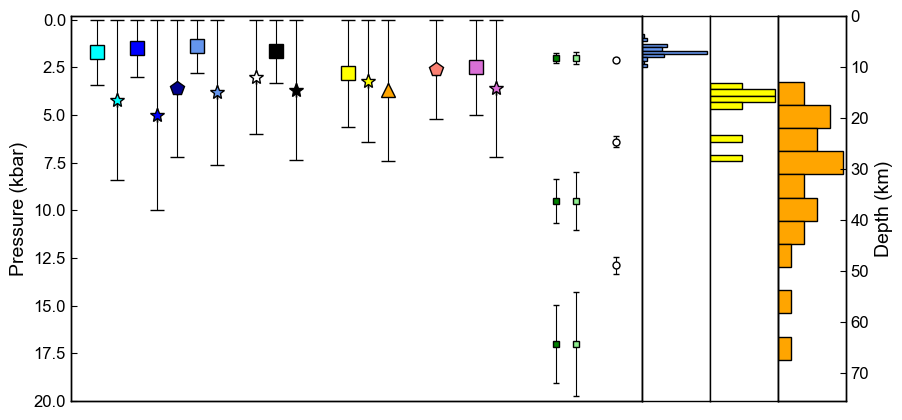

In [6]:
## Start from zero
fig, ((ax2),(ax1b), (ax1d), (ax1c)) = plt.subplots(1, 4, figsize=(10,5),gridspec_kw={'width_ratios': [4.2, 0.5, 0.5, 0.5]})
plt.subplots_adjust(wspace=0, hspace=0)

# Compilation of errors. Square is calibration data, 
#-----------------Cpx - Liq -------------------#
ax1=ax2.twinx()
ax2b=ax1c.twinx()
int_mod_s=0.5
bet_mod_s=1

Pressure_set=5.5

offset_zero=0

# Putirka et al. 2003
ax2.errorbar(0, offset_zero+1.7, 
             xerr=0, yerr=1.7, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='cyan', 
             ms=10, mec='k', 
             label='Putirka et al. 2003')
ax2.errorbar(0+int_mod_s, offset_zero+4.2, 
             xerr=0, yerr=4.2, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='cyan', 
             ms=10, mec='k', 
             label='Putirka et al. 2003')



# Putirka (2008) eq32c
ax2.errorbar(0+bet_mod_s, offset_zero+1.5, 
             xerr=0, yerr=1.5, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='blue', 
             ms=10, mec='k', 
             label='eq32c')
ax2.errorbar(0+bet_mod_s+int_mod_s, offset_zero+5, 
             xerr=0, yerr=5, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='blue', 
             ms=10, mec='k', 
             label='eq32c')


# Putirka (2008) eq30

ax2.errorbar(0+2*bet_mod_s, offset_zero+3.6, 
             xerr=0, yerr=3.6, capsize=5,
             fmt='p', ecolor='k', 
             elinewidth=0.8, mfc='darkblue', 
             ms=10, mec='k', 
             label='eq32c')


# Neave and Putirka 2017

ax2.errorbar(0+2.5*bet_mod_s, offset_zero+1.4, 
             xerr=0, yerr=1.4, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='cornflowerblue', 
             ms=10, mec='k', 
             label='NP17')
ax2.errorbar(0+2.5*bet_mod_s+int_mod_s, offset_zero+3.8, 
             xerr=0, yerr=3.8, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='cornflowerblue', 
             ms=10, mec='k', 
             label='NP17')
# Petrelli et al. 2020

ax2.errorbar(0+4*bet_mod_s, offset_zero+3, 
             xerr=0, yerr=3, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='white', 
             ms=10, mec='k', 
             label='Pet20')

# Wang et al. (2021)
ax2.errorbar(0+4.5*bet_mod_s, offset_zero+1.66, 
             xerr=0, yerr=1.66, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='black', 
             ms=10, mec='k', 
             label='Wang21')
ax2.errorbar(0+4.5*bet_mod_s+int_mod_s, offset_zero+3.68, 
             xerr=0, yerr=3.68, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='black', 
             ms=10, mec='k', 
             label='Wang21')
## Cpx-Opx
cpx_opx_start=6.3
ax2.errorbar(0+cpx_opx_start, offset_zero+2.8, 
             xerr=0, yerr=2.8, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='yellow', 
             ms=10, mec='k', 
             label='eq39')
ax2.errorbar(0+cpx_opx_start+int_mod_s, offset_zero+3.2, 
             xerr=0, yerr=3.2, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='yellow', 
             ms=10, mec='k', 
             label='eq39')

ax2.errorbar(0+cpx_opx_start+1, offset_zero+3.7, 
             xerr=0, yerr=3.7, capsize=5,
             fmt='^', ecolor='k', 
             elinewidth=0.8, mfc='orange', 
             ms=10, mec='k', 
             label='eq38')

## Orthopyroxene - Equation 29a
opx_start=8.5
ax2.errorbar(0+opx_start, offset_zero+2.6, 
             xerr=0, yerr=2.6, capsize=5,
             fmt='p', ecolor='k', 
             elinewidth=0.8, mfc='salmon', 
             ms=10, mec='k', 
             label='eq39')

# Equation 29c - Opx -only
ax2.errorbar(0+opx_start+2*int_mod_s, offset_zero+2.5, 
             xerr=0, yerr=2.5, capsize=5,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='orchid', 
             ms=10, mec='k', 
             label='eq39')
ax2.errorbar(0+opx_start+int_mod_s*3, offset_zero+3.6, 
             xerr=0, yerr=3.6, capsize=5,
             fmt='*', ecolor='k', 
             elinewidth=0.8, mfc='orchid', 
             ms=10, mec='k', 
             label='eq39')


## OPAM


## Amp- only and melt inclusions #################################
Amp_start=11.5
# Ridolfi gives as 12% errors
P_perc=np.linspace(2, 17, 3)
ax2.errorbar(P_perc*0+Amp_start, P_perc, 
             xerr=0, yerr=P_perc*0.12, capsize=2,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='green', 
             ms=5, mec='k', 
             label='Ridolfi21')


ax2.errorbar(P_perc*0+Amp_start+0.5*bet_mod_s, P_perc, 
             xerr=0, yerr=P_perc*0.16, capsize=2,
             fmt='s', ecolor='k', 
             elinewidth=0.8, mfc='lightgreen', 
             ms=5, mec='k', 
             label='Ridolfi21')

# Kyles FIs
ax2.errorbar(0*Av_df_2step['Mean_MC_P_kbar']+Amp_start+1.5, Av_df_2step['Mean_MC_P_kbar'], 
             xerr=0, yerr=Av_df_2step['std_dev_MC_P_kbar'], capsize=2,
             fmt='o', ecolor='k', 
             elinewidth=0.8, mfc='white', 
             ms=5, mec='k', 
             label='Errors')




ax1b.hist(spread_rate_ocean['Crustal_thickness'], ec='k', orientation='horizontal', color='cornflowerblue')
ax1c.hist(Arc_Profeta['Moho_depth'], ec='k', orientation='horizontal', 
          color='orange', bins=12)
ax1d.hist(OIB_Comp['Crustal Thickness_av'], ec='k', orientation='horizontal', 
          color='yellow', bins=12)              
ax2.axes.get_xaxis().set_visible(False)
ax1b.axes.get_xaxis().set_visible(False)
ax1c.axes.get_xaxis().set_visible(False)
ax1d.axes.get_xaxis().set_visible(False)

ax1.axes.get_yaxis().set_visible(False)
ax1b.axes.get_yaxis().set_visible(False)
ax1c.axes.get_yaxis().set_visible(False)
ax1d.axes.get_yaxis().set_visible(False)

# ax1d.axes.get_xaxis().set_visible(False)
# ax1d.axes.get_yaxis().set_visible(False)



# ax2.axes.get_xaxis().set_visible(False)
# ax1.axes.get_xaxis().set_visible(False)



P_linspace=np.linspace(-0.2, 20, 100)
ax2.set_ylim([ P_linspace[-1], P_linspace[0]])
ax2b.set_ylim([Depth[-1], Depth[0]])
Depth=pf.loop_pressure_depth_2step(P_kbar=P_linspace, d1=20, rho2=2800, rho1=2800)
ax1b.set_ylim([ Depth[-1], Depth[0]])
ax1c.set_ylim([ Depth[-1], Depth[0]])
ax1d.set_ylim([ Depth[-1], Depth[0]])
# ax1.set_xlim([-1, 13.5])

# ax1.invert_yaxis()
# # ax1b.invert_yaxis()
# # ax1c.invert_yaxis()
# # ax1d.invert_yaxis()
# ax2.invert_yaxis()
# ax2b.invert_yaxis()
ax1.set_ylabel('Pressure (kbar)')
ax2.set_ylabel('Pressure (kbar)')
ax2b.set_ylabel('Depth (km)')
fig.savefig('Precision_Required.png', dpi=300, transparent=True)

In [7]:
np.min(spread_rate_ocean['Crustal_thickness'])

2.80168718172238

In [8]:
np.min(OIB_Comp['Crustal Thickness_av'])

12.0

In [9]:
np.min(Arc_Profeta['Moho_depth'])

11.8

<ErrorbarContainer object of 3 artists>

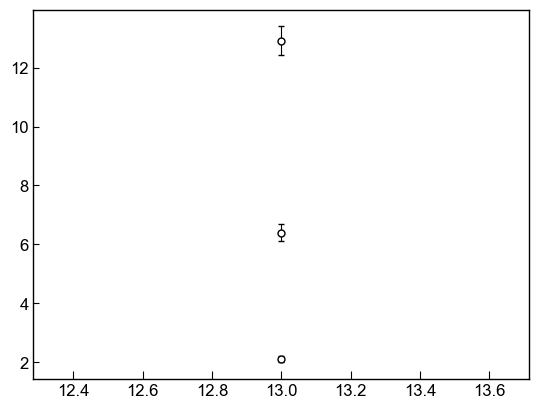

In [7]:
plt.errorbar(0*Av_df_2step['Mean_MC_P_kbar']+Amp_start+1.5, Av_df_2step['Mean_MC_P_kbar'], 
             xerr=0, yerr=Av_df_2step['std_dev_MC_P_kbar'], capsize=2,
             fmt='o', ecolor='k', 
             elinewidth=0.8, mfc='white', 
             ms=5, mec='k', 
             label='Errors')